In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [14]:
def plot_feature_importances(model):
    n_features = X_test.shape[1]
    plt.figure()
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_test.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.show()

In [4]:
#匯入資料、前處理
import pandas as pd
from sklearn.preprocessing import LabelEncoder
data_test = pd.read_csv("C:\\adult.test.txt")
data_train = pd.read_csv("C:\\adult.train.txt")
data_test.columns=["age", "workclass", "fnlwgt", "education","education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "Income"]
data_train.columns=["age", "workclass", "fnlwgt", "education","education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "Income"]
data_test = data_test.drop(data_test[data_test['workclass']==" ?"].index)
data_train = data_train.drop(data_train[data_train['workclass']==" ?"].index)
for col in data_train[["workclass","marital-status",  "education","occupation","relationship","race","capital-loss","sex","native-country","Income"]]:
    LE=LabelEncoder()
    data_train[col]=LE.fit_transform(data_train[col])
for col in data_test[["workclass","marital-status",  "education","occupation","relationship","race","capital-loss","sex","native-country","Income"]]:
    LE=LabelEncoder()
    data_test[col]=LE.fit_transform(data_test[col])

In [5]:
#切割訓練集
X_train = data_train.drop(["hours-per-week"], axis=1)
y_train= data_train["hours-per-week"]

In [6]:
#切割測試集
X_test= data_test.drop(["hours-per-week"], axis=1)
y_test= data_test["hours-per-week"]
y_test

0        50
1        40
2        40
4        30
6        32
         ..
16274    40
16275    36
16277    50
16278    40
16279    60
Name: hours-per-week, Length: 15317, dtype: int64

In [7]:
#資料標準化
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features = scaler.transform(X_train)
data_test_columns=["age", "workclass", "fnlwgt", "education","education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "native-country", "Income"]
X_train= pd.DataFrame(scaled_features, columns=data_test_columns)
scaler = StandardScaler()
scaler.fit(X_test)
scaled_features = scaler.transform(X_test)
data_test_columns=["age", "workclass", "fnlwgt", "education","education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "native-country", "Income"]
X_test= pd.DataFrame(scaled_features, columns=data_test_columns)

In [8]:
#KNN(n=3)調整前
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
MAE = metrics.mean_squared_error(y_test, pred)

print("KNN調整前之MSE:", MAE)
print("KNN調整前之RMSE:", math.sqrt(MAE))
print("KNN調整前之MAPE:", metrics.mean_absolute_percentage_error(y_test, pred))

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN調整前之MSE: 198.842397336293
KNN調整前之RMSE: 14.101148794913591
KNN調整前之MAPE: 0.2849364667880739


In [9]:
#SVR調整前
svr = svm.SVR(C=1)
svr.fit(X_train, y_train)
pred = svr.predict(X_test)

MAE = metrics.mean_squared_error(y_test, pred)

print("SVR調整前之MAE:", MAE)
print("SVR調整前之RMSE:", math.sqrt(MAE))
print("SVR調整前之MAPE:", metrics.mean_absolute_percentage_error(y_test, pred))

SVR調整前之MSE: 123.93006834402728
SVR調整前之RMSE: 11.132388258771218
SVR調整前之MAPE: 0.27251688733605745


In [10]:
#RandomForest調整前
randomForest = RandomForestRegressor(n_estimators=100, criterion = "mse")
randomForest.fit(X_train, y_train)
pred = randomForest.predict(X_test)

MAE = metrics.mean_squared_error(y_test, pred)

print("RandomForest調整前之MAE:", MAE)
print("RandomForest調整前之RMSE:", math.sqrt(MAE))
print("RandomForest調整前之MAPE:", metrics.mean_absolute_percentage_error(y_test, pred))

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForest調整前之MSE: 116.94715915578749
RandomForest調整前之RMSE: 10.814210981656844
RandomForest調整前之MAPE: 0.272645875856374


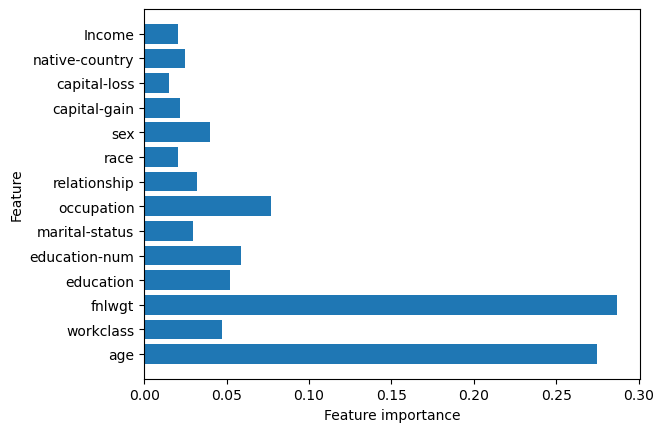

In [15]:
#特徵重要性-以RandomForest Model找尋重要性最高之特徵
plot_feature_importances(randomForest)

In [16]:
#刪除重要性最高之特徵-LDAPS_Tmax_lapse
X_train = X_train.drop(["fnlwgt"], axis=1)
X_test = X_test.drop(["fnlwgt"], axis=1)

In [17]:
#KNN(n=3)調整後
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train.astype("string"))
pred = knn.predict(X_test)

MAE = metrics.mean_squared_error(y_test, pred)

print("KNN調整後之MAE:", MAE)
print("KNN調整後之RMSE:", math.sqrt(MAE))
print("KNN調整後之MAPE:", metrics.mean_absolute_percentage_error(y_test, pred))

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN調整後之MAE: 191.39661813671086
KNN調整後之RMSE: 13.834616660273275
KNN調整後之MAPE: 0.28176126305529997


In [18]:
#SVR調整後
svr = svm.SVR(C=1)
svr.fit(X_train, y_train)
pred = svr.predict(X_test)

MAE = metrics.mean_squared_error(y_test, pred)

print("SVR調整後之MAE:", MAE)
print("SVR調整後之RMSE:", math.sqrt(MAE))
print("SVR調整後之MAPE:", metrics.mean_absolute_percentage_error(y_test, pred))

SVR調整後之MAE: 123.47797978407118
SVR調整後之RMSE: 11.112064604926989
SVR調整後之MAPE: 0.2711515250750206


In [19]:
#RandomForest調整後
randomForest = RandomForestRegressor(n_estimators=100, criterion = "mse")
randomForest.fit(X_train, y_train)
pred = randomForest.predict(X_test)

MAE = metrics.mean_squared_error(y_test, pred)

print("RandomForest調整後之MAE:", MAE)
print("RandomForest調整後之RMSE:", math.sqrt(MAE))
print("RandomForest調整後之MAPE:", metrics.mean_absolute_percentage_error(y_test, pred))

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForest調整後之MAE: 127.191500669139
RandomForest調整後之RMSE: 11.277920937350952
RandomForest調整後之MAPE: 0.2807092616827253
